In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.widgets import Slider

In [2]:
data = pd.read_csv("DSsalaries.csv")
type(data)
pd.set_option('display.max_columns',None) #Displays all columns availabe
data.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2682,2022,SE,FT,Data Scientist,144000,USD,144000,US,0,US,L
1233,2023,SE,FT,Data Engineer,250000,USD,250000,US,100,US,M
75,2023,SE,FT,Computer Vision Engineer,210000,USD,210000,US,0,US,M
476,2023,SE,FT,Data Engineer,223250,USD,223250,US,0,US,M
367,2023,MI,FT,Research Scientist,161200,GBP,195895,GB,0,GB,M
1846,2022,SE,FT,Data Scientist,51000,USD,51000,US,100,US,M
1980,2022,SE,FT,Data Engineer,130000,USD,130000,US,100,US,M
684,2023,MI,FT,Data Analyst,112000,USD,112000,US,0,US,M
3297,2022,MI,FT,Data Analyst,115500,USD,115500,US,100,US,M
2933,2022,MI,CT,Analytics Engineer,7500,USD,7500,BO,50,BO,M


In [3]:
data.drop(columns=['salary'])# Deletes salary column from data2 table
data.drop(columns=['salary_currency']) # Deletes salary_currency column from data2 table
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
data3 = data.dropna() #Drops NaN missing values
data3.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [5]:
data3.duplicated().value_counts()# Shows duplicated values i.e if duplicated = TRUE, if not = FALSE

False    2584
True     1171
Name: count, dtype: int64

In [6]:
data3['experience_level'].unique() #Identifies unique values from column = experience_level using .unique() keyword.

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [7]:
data3['job_title'].unique()#Identifies unique values from column = job_title using .unique() keyword.

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [8]:
data3['work_year'].unique()#Identifies unique values from column = work_year using .unique() keyword.

array([2023, 2022, 2020, 2021])

In [9]:
data3['employment_type'].unique()#Identifies unique values from column = employment_type using .unique() keyword.

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [10]:
data3['salary_in_usd'].unique()#Identifies unique values from column = salary_in_usd using .unique() keyword.

array([ 85847,  30000,  25500, ...,  28369, 412000,  94665])

In [11]:
data3['employee_residence'].unique()#Identifies unique values from column = employee_residence using .unique() keyword.

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [12]:
data3['remote_ratio'].unique()#Identifies unique values from column = remote_ratio using .unique() keyword.

array([100,   0,  50])

In [13]:
data3['company_location'].unique()#Identifies unique values from column = xompany_location  using .unique() keyword.

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [14]:
data3['company_size'].unique() #Identifies unique values from column = company_size using .unique() keyword.

array(['L', 'S', 'M'], dtype=object)

In [15]:
data3['experience_level'].replace({'SE': 'Senior Level/Expert', 'MI':'Medium Level/Intermediate', 'EN': 'Entry Level', 'EX': 'Executive Level'}, inplace = True)
 # Replaces rows of experience_level column using .replace keyword in key value pairs. inplace = true modifies dataframe directly and changes takes place in original data too.
data3

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level/Expert,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Medium Level/Intermediate,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Entry Level,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Entry Level,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [17]:
Remote_ratio = data3.remote_ratio#Python program to calulate sum of data in remote_ratio column of Data Science Salaries table.
SumofCol = 0
for i in Remote_ratio:
  SumofCol += i
SumofCol

173750

In [16]:
Remote_ratio = data3.remote_ratio
TotalofCol = 0
for i in Remote_ratio:
  TotalofCol += i
Mean = TotalofCol/len(Remote_ratio)#Python program to calulate mean value of data in remote_ratio column of Data Science Salaries table.
"Mean value of remote_ratio column of Data Science Salaries Table: " + str(Mean) # Converted mean value i.e in float to string for easy concatenation.

'Mean value of remote_ratio column of Data Science Salaries Table: 46.271637816245004'

In [18]:
data3['remote_ratio'].mean()

46.271637816245004

In [19]:
SD = sum((Remote_ratio - Mean) ** 2)#Python program to calulate mean value of data in remote_ratio column of Data Science Salaries table.
SD2 =  SD / len(Remote_ratio)
SD3 = SD2 ** 0.5
"Standard Deviation of remote_ratio column of Data Science Salaries Table: " + str(SD3)# Converted SD value i.e in float to string for easy concatenation.

'Standard Deviation of remote_ratio column of Data Science Salaries Table: 48.58258012626557'

In [20]:
data3['remote_ratio'].std()

48.589050470587566

In [21]:
data3.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [22]:
data3['remote_ratio'].skew() # Skew using .skew() function of pandas

0.1494539003820896

In [23]:
SumSkew = 0 # Python program to find the Skew of remote_ratio column
for i in Remote_ratio:
        SumSkew += (i - Mean) ** 3

Fskew = SumSkew /  ((len(Remote_ratio)-1) * SD3 ** 3)
Fskew

0.14943398780066935

In [24]:

Kurtosis = 0 # Python program to find the kurtosis of remote_ratio column
for i in Remote_ratio:
        Kurtosis += ((i - Mean)/SD) ** 4
        FinalKurtosis = Kurtosis / len(Remote_ratio)-1
FinalKurtosis


-1.0

In [25]:
SalaryUSD = data3.salary_in_usd #Python program to find the mean value of salary_in_usd column
TotalofCol = 0
for i in SalaryUSD:
  TotalofCol += i
Mean2 = TotalofCol/len(SalaryUSD)
Mean2

137570.38988015978

In [26]:
data3['remote_ratio'].corr(data3['salary_in_usd'])

-0.06417098519057558

In [27]:
corr1 = (Remote_ratio - Mean).sum() * (SalaryUSD - Mean2)
corr2 = ((((Remote_ratio - Mean))**2).sum() * (((SalaryUSD - Mean2).sum())**2).sum()) **2
Finalcorr = corr1/corr2
Finalcorr

0      -1.895808e+09
1      -3.942759e+09
2      -4.107696e+09
3       1.371901e+09
4      -6.440044e+08
            ...     
3750    1.005862e+10
3751    4.922332e+08
3752   -1.193797e+09
3753   -1.377061e+09
3754   -1.572604e+09
Name: salary_in_usd, Length: 3755, dtype: float64

In [28]:
Top15 = data3['job_title'].value_counts().head(15) #value_counts() = counts every repetation of the value and prints it.
Top15

job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: count, dtype: int64

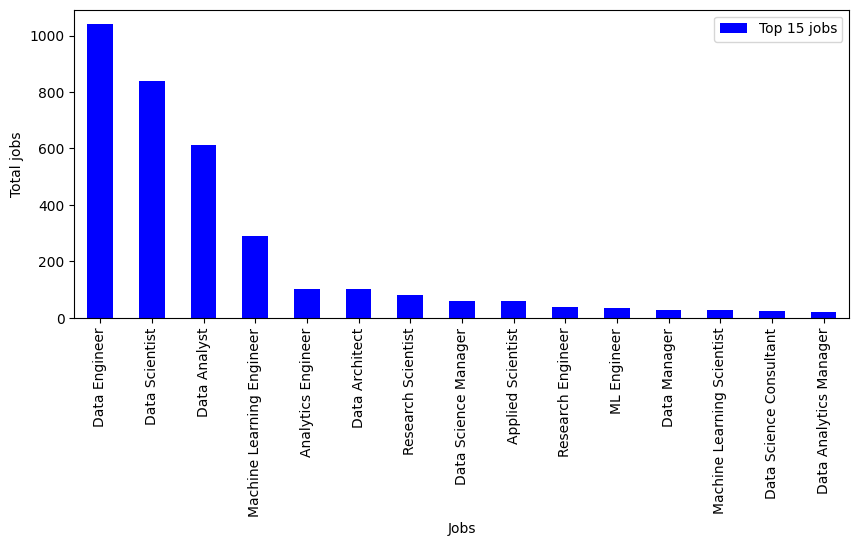

In [29]:
plt.figure(figsize=(10, 4))
Top15.plot.bar(label="Top 15 jobs",color="Blue",width=0.5)
plt.xlabel('Jobs')
plt.ylabel('Total jobs')
plt.legend()

In [30]:
Gdata = data3.groupby('job_title')['salary_in_usd'].mean() #Python Program to show top 5 highest paying job
sorted_data = Gdata.sort_values(ascending = False)
top_5_jobs = sorted_data.head(5)
top_5_jobs

job_title
Data Science Tech Lead      375000.000
Cloud Data Architect        250000.000
Data Lead                   212500.000
Data Analytics Lead         211254.500
Principal Data Scientist    198171.125
Name: salary_in_usd, dtype: float64

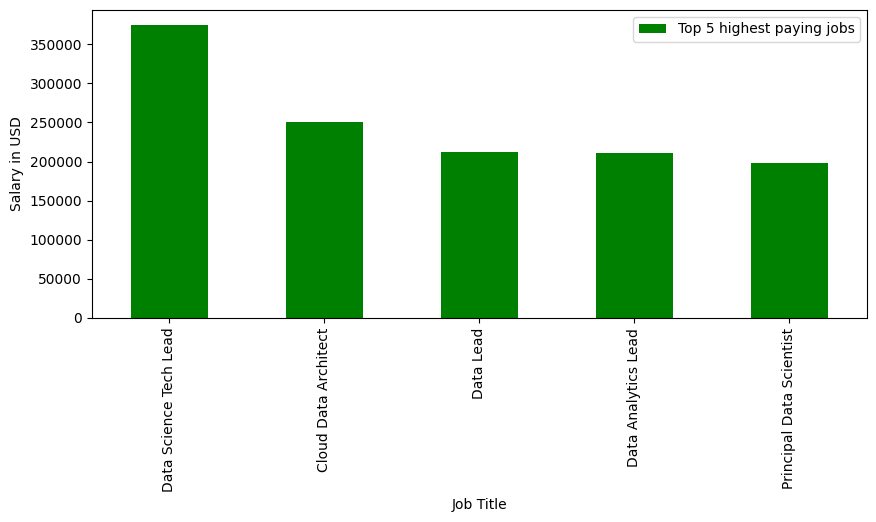

In [31]:
plt.figure(figsize=(10, 4)) #Python Program to show top 5 highest paying job in a bar graph.
top_5_jobs.plot.bar(label="Top 5 highest paying jobs",color="Green",width=0.5)
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.legend()

In [32]:
ExpSalary = data3.groupby('experience_level')['salary_in_usd'].max() #program to find out salaries based on experience level
ExpSalary

experience_level
Entry Level                  300000
Executive Level              416000
Medium Level/Intermediate    450000
Senior Level/Expert          423834
Name: salary_in_usd, dtype: int64

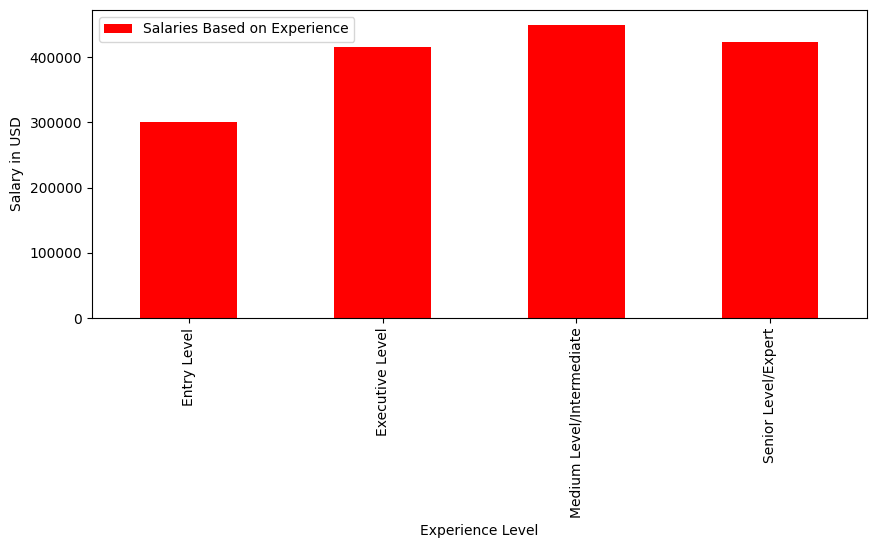

In [33]:
plt.figure(figsize=(10, 4)) #Bar Graph to show the Salary according to experience level
ExpSalary.plot.bar(label="Salaries Based on Experience",color="Red",width=0.5)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend()

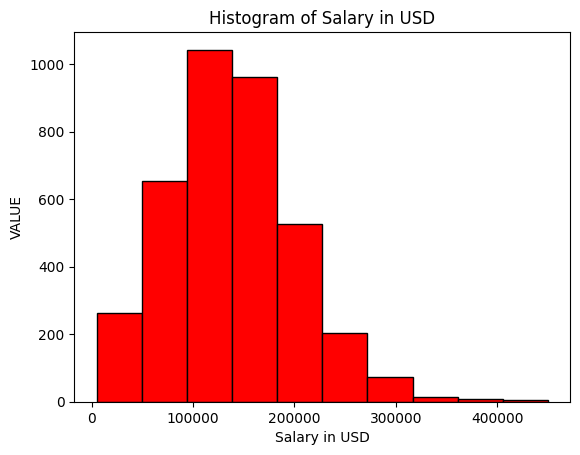

In [44]:

plt.hist(data3['salary_in_usd'], bins=10,color = 'red', edgecolor='black') # Histogram for salary_in_usd
plt.xlabel('Salary in USD')
plt.ylabel('VALUE')
plt.title('Histogram of Salary in USD')
plt.show()

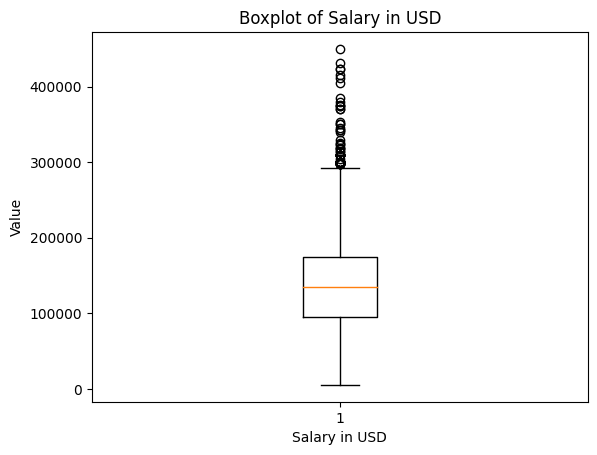

In [41]:
plt.boxplot(data3['salary_in_usd']) # Boxplot for salary_in_usd
plt.xlabel('Salary in USD')
plt.ylabel('Value')
plt.title('Boxplot of Salary in USD')
plt.show()